<a href="https://colab.research.google.com/github/thiagoolivieri/data_analysis/blob/main/Analise_Airbnb_San_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Análise Airbnb - San Francisco*


Com a finalidade de estudo referente análise de dados, visando converter os dados do mundo real em insights significativos, neste notebook, iremos analisar os dados referente à cidade de San Francisco.

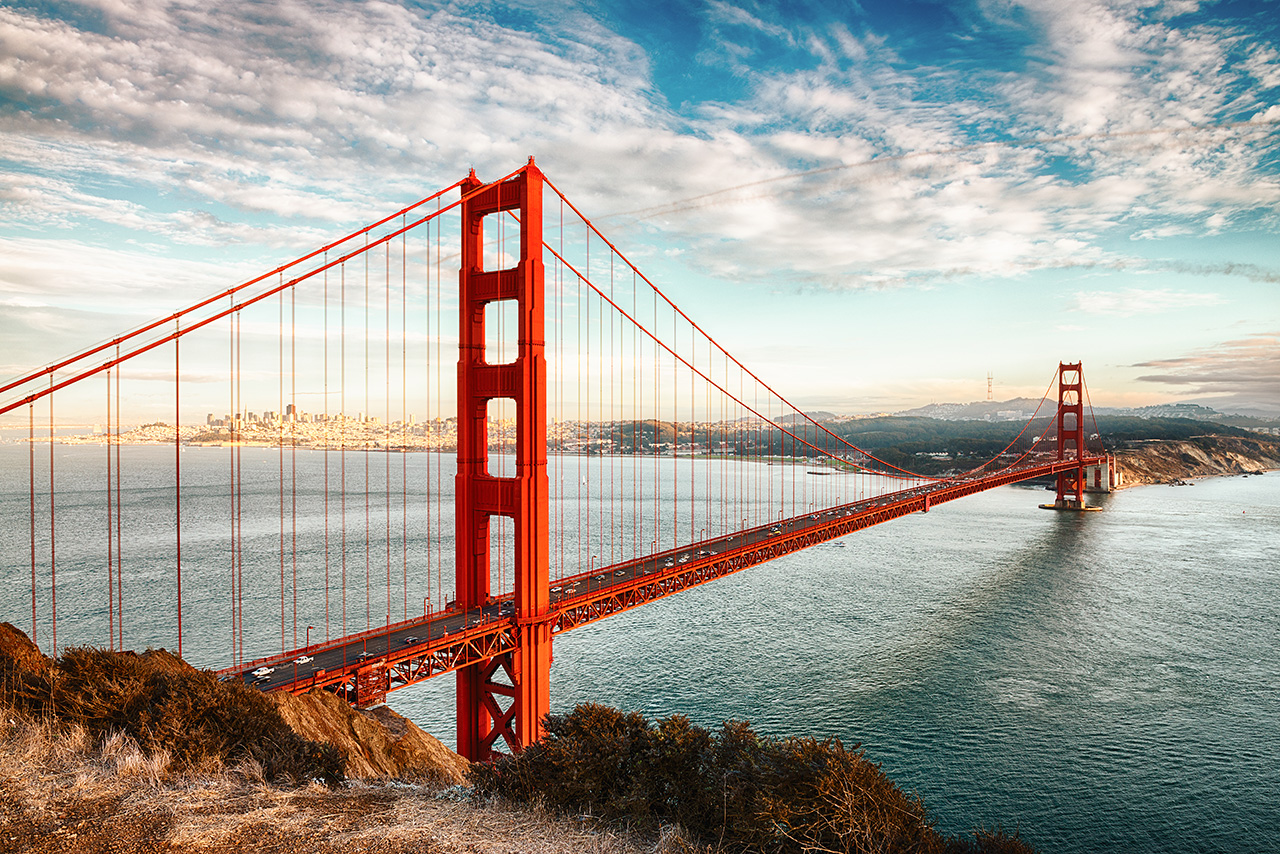

## Localização
* Cidade localizada no norte do estado da Califórnia
* Situada na ponta de uma península cercada pelo Oceano Pacífico e pela Baía de San Francisco
* País: Estados Unidos

## Obtenção dos dados

Dados obtidos por meio do site - [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in San Francisco (good for visualisations).*

In [2]:
# importar os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# configurando tamanho dos gráficos para seaborn
sns.set(rc={'figure.figsize':(12, 10)})

In [3]:
# importar o arquivo listings.csv para o DataFrame
df = pd.read_csv('listings.csv')

## Entendendo o conjunto de dados

In [4]:
print(f'Quantidade de registros do arquivo: {df.shape[0]}')
print(f'Quantidade de colunas do arquivo: {df.shape[1]}')

Quantidade de registros do arquivo: 6413
Quantidade de colunas do arquivo: 18


***Variáveis***

* <b>id</b> - Identificador da base de dados do Airbnb para o anúncio
* <b>name</b> - Nome da propriedade anunciada
* <b>host_id</b> - Identificador do proprietário
* <b>host_name</b> - Nome do proprietário 
* <b>neighbourhood_group</b> - Não apresenta valores
* <b>neighbourhood</b> - Bairro onde está localizada a propriedade
* <b>latitude</b> - Coordenada da latitude da propriedade
* <b>longitude</b> - Coordenada da longitude da propriedade
* <b>room_type</b> - Tipo da propriedade
* <b>price</b> - Preço da diária para alugar o imóvel
* <b>minimum_nights</b> - Quantidade mínima de noites para alugar o imóvel
* <b>number_of_reviews</b> - Quantidade de reviews que o imóvel possui
* <b>last_review</b> - Data do review mais recente
* <b>reviews_per_month</b> - Quantidade de reviews por mês
* <b>calculated_host_listings_count</b> - Quantidade de imóveis do mesmo host
* <b>availability_365</b> - Número de dias de disponibilidade dentro de 365 dias
* <b>number_of_reviews_ltm</b> - Quantidade de reviews nos últimos 12 meses
* <b>license</b> - Licença (Algumas prefeituras exigem que os anfitriões obtenham um número de licença ou registro para anunciar seus espaços no Airbnb)

In [5]:
# exibir as primeiras 5 linhas do conjunto de dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,161,2,314,2021-11-19,3.60,1,126,43,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.76,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,364,0,STR-0000264


In [6]:
# exibir as ultimas 5 linhas do conjunto de dados
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6408,53647090,1806b - Cozy Studio at convenient at Noriega&19th,434407790,Zhi Rong,NaN,Inner Sunset,37.755085,-122.475680,Entire home/apt,79,1,0,NaN,NaN,2,163,0,City registration pending
6409,53647393,Remodeled Civic Center Studio!,4430421,Landmark,NaN,Downtown/Civic Center,37.784574,-122.416674,Entire home/apt,67,30,0,NaN,NaN,146,180,0,NaN
6410,53648447,Newly Renovated Private Room Stunning Rooftop ...,309026529,Jessica,NaN,Mission,37.749610,-122.415539,Private room,70,30,0,NaN,NaN,5,358,0,NaN
6411,53651249,"Modern, quiet studio in Noe Valley",44856782,Ellen,NaN,Noe Valley,37.755677,-122.433097,Entire home/apt,88,30,0,NaN,NaN,1,358,0,NaN
6412,53658420,"Nob Hill Flat, Steps From Cafes & Restaurants",870172,Hazel,NaN,Nob Hill,37.793611,-122.416639,Entire home/apt,100,30,0,NaN,NaN,4,365,0,NaN


In [7]:
# mostrar os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Para facilitar as análises das variáveis do tipo numérica, será criado uma lista com as váriaveis do tipo **int** e **float**

Não serão consideradas as variáveis:
* **id** - pelo fato de ser um identifcador
* **neighbourhood_group** - não ter dados
* **host_id** - pelo fato de ser um identificador

In [8]:
#Colunas variáveis numéricas
desconsiderar_colunas = ['id', 'neighbourhood_group', 'host_id']
col_variaveis_numericas = []
[col_variaveis_numericas.append(cnt) for cnt in list(df.loc[:, df.dtypes != object].columns) if cnt not in desconsiderar_colunas]

print('Variaveis numéricas:\n')
for cnt in col_variaveis_numericas:
    print(cnt)

Variaveis numéricas:

latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm


## Tratando valores ausentes

In [9]:
# verificar quantidade de valores ausentes
df_valores_ausentes = pd.DataFrame(df.isnull().sum(), columns = ['Qtde. Valores Ausentes'])
df_valores_ausentes['% Valores Ausentes'] = (df_valores_ausentes['Qtde. Valores Ausentes']/len(df)) * 100
df_valores_ausentes.sort_values(by=['Qtde. Valores Ausentes'], ascending = False)

,Qtde. Valores Ausentes,% Valores Ausentes
neighbourhood_group,6413,100.000000
license,2785,43.427413
reviews_per_month,1336,20.832684
last_review,1336,20.832684
host_name,14,0.218307
minimum_nights,0,0.000000
number_of_reviews_ltm,0,0.000000
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000


Iremos excluir as seguintes colunas do dataframe:

* **neighbourhood_group** - Não possui registros
* **license** - Possui um número significativo de valores ausentes porém não será utilizada nessa análise

In [10]:
# Excluir as colunas neighbourhood_group e license do DataFrame
df.drop(columns =['neighbourhood_group','license'], inplace = True)

Filtrando os dados da coluna **review_per_month** onde os valores não estão preenchidos **E** da coluna **number_of_reviews** onde o valor for igual a **zero**, podemos perceber que o filtro retorna a mesma quantidade de valores não preenchido da coluna **review_per_month**

In [11]:
df[['number_of_reviews','reviews_per_month']][(df['number_of_reviews'] == 0) & (df['reviews_per_month'].isnull())]

,number_of_reviews,reviews_per_month
234,0,NaN
253,0,NaN
255,0,NaN
300,0,NaN
317,0,NaN
...,...,...
6408,0,NaN
6409,0,NaN
6410,0,NaN
6411,0,NaN


Por isso iremos substituir os valores ausentes da coluna **reviews_per_month** por **zero**

In [12]:
#preencher os valores ausentes da coluna reviews_per_month por zero
df['reviews_per_month'].fillna(0, inplace = True)

Vericando a mesma possibilidade do exemplo anterior, mas agora com a coluna **last_review**

In [13]:
df[['number_of_reviews','last_review']][(df['number_of_reviews'] == 0) & (df['last_review'].isnull())]

,number_of_reviews,last_review
234,0,NaN
253,0,NaN
255,0,NaN
300,0,NaN
317,0,NaN
...,...,...
6408,0,NaN
6409,0,NaN
6410,0,NaN
6411,0,NaN


Mesmo resultado, porém como não iremos utiliza-lá nessa análise, iremos exclui-lá do DataFrame

In [14]:
# Excluir a coluna last_review do DataFrame
df.drop(columns =['last_review'], inplace = True)

Para a coluna **host_name**, apenas iremos substituir os valores ausentes por 'NAO PREENCHIDO'

In [15]:
# Preencher os valores ausentes por NAO PREENCHIDO
df['host_name'].fillna('NAO PREENCHIDO', inplace = True)

In [16]:
# Rever a quantidade de valores ausentes
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Verificando Outliers

**Outliers** - Valores que se diferenciam drasticamente comparados a valores do mesmo subconjunto de dados

### Distribuição das variáveis

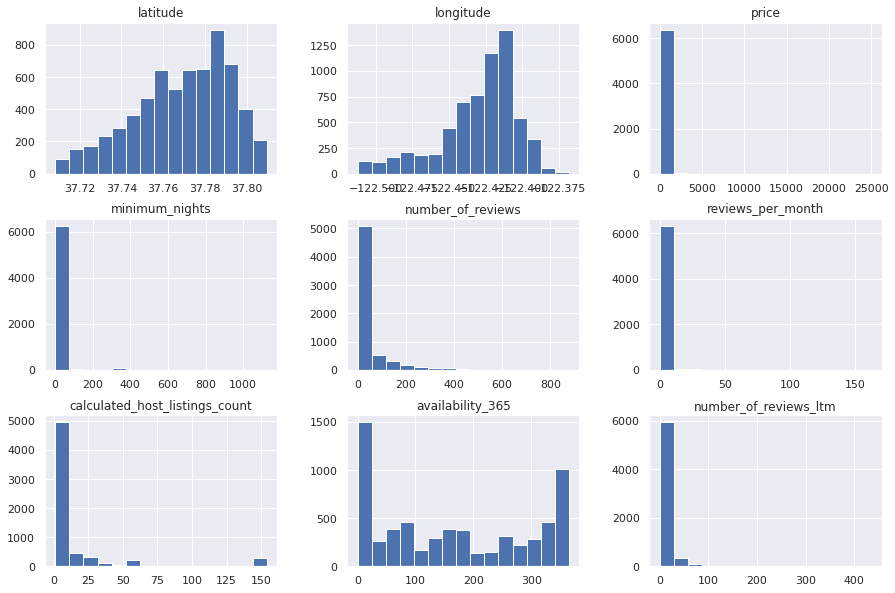

In [17]:
#plotar histograma das variaveis numéricas
df[col_variaveis_numericas].hist(bins=15, figsize=(15,10));

In [18]:
#descrição estatística das variáveis numéricas
df[col_variaveis_numericas].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000
mean,37.768517,-122.429795,228.636520,24.007797,44.483861,1.627630,14.352253,166.752534,6.895057
std,0.022844,0.026904,671.915606,49.746920,85.496409,5.179492,32.645732,133.528567,16.514490
min,37.708370,-122.512460,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.753230,-122.442490,93.000000,2.000000,1.000000,0.040000,1.000000,33.000000,0.000000
50%,37.772026,-122.423260,145.000000,30.000000,7.000000,0.370000,2.000000,153.000000,1.000000
75%,37.787430,-122.410580,232.000000,30.000000,45.000000,1.540000,9.000000,306.000000,5.000000
max,37.809540,-122.368230,25000.000000,1125.000000,877.000000,162.000000,154.000000,365.000000,435.000000


O dataset possui 6413 linhas
497 entradas acima de 440.5
7.749883050054576% do dataset


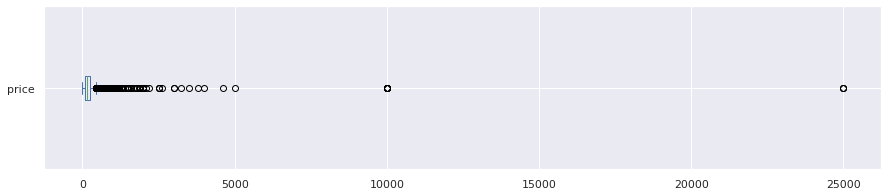

In [19]:
# identificar os outliers da variável price

q1_price = df['price'].quantile(.25)
q3_price = df['price'].quantile(.75)
iqr_price = q3_price - q1_price

sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print(f'O dataset possui {len(df)} linhas')
print(f'{len(df[df["price"] > sup_price])} entradas acima de {sup_price}')
print(f'{(len(df[df["price"] > sup_price]) / len(df)) * 100}% do dataset')

df['price'].plot(kind = 'box', vert = False, figsize= (15,3));

O dataset possui 6413 linhas
183 entradas acima de 72.0
2.853578668329955% do dataset


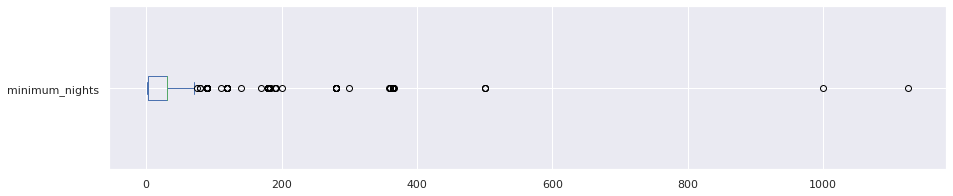

In [20]:
# identificar os outliers da variável minimum_nights

q1_minimum_nights = df['minimum_nights'].quantile(.25)
q3_minimum_nights = df['minimum_nights'].quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print(f'O dataset possui {len(df)} linhas')
print(f'{len(df[df["minimum_nights"] > sup_minimum_nights])} entradas acima de {sup_minimum_nights}')
print(f'{(len(df[df["minimum_nights"] > sup_minimum_nights]) / len(df)) * 100}% do dataset')

df['minimum_nights'].plot(kind = 'box', vert = False, figsize= (15,3));

In [21]:
# Criar cópia do DataFrame
df_clean = df.copy()

In [22]:
# Remover os outliers e os zeros das colunas price
df_clean.drop(df_clean[df_clean['price'] > sup_price].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['price'] == 0].index, axis = 0, inplace = True)

# Remover os outliers da coluna minimum_nights
df_clean.drop(df_clean[df_clean['minimum_nights'] > sup_minimum_nights].index, axis = 0, inplace = True)

df_clean.reset_index(drop = True, inplace = True)

In [23]:
print(f'Quantidade de registros antes da limpeza: {len(df)}')
print(f'Quantidade de registros após a limpeza: {len(df_clean)}')

Quantidade de registros antes da limpeza: 6413
Quantidade de registros após a limpeza: 5743


## Correlação das variáveis

Correlação: relação ou semelhança entre duas variávies

Coeficiente de correlação: número entre -1 e 1 que mede o grau de associação entre as variáveis:
* **-1**: Quanto mais próximo de **-1**, mais fraca é essa relação
* **1**: Quanto mais próximo de **1**, mais forte é essa relação
* **0**: Quanto mais próximo de **0**, tende a não ter relação 

<font color='red'>Correlação não implica em causalidade</font>

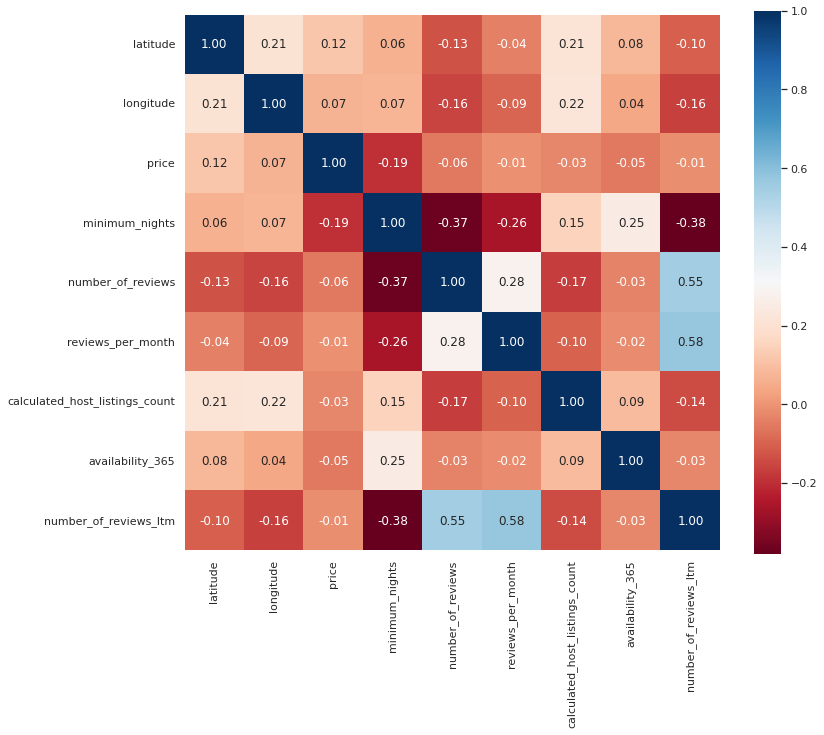

In [24]:
sns.heatmap(df_clean[col_variaveis_numericas].corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Quais os bairros possuem mais imóveis?

In [25]:
# Contar a quantidade de vezes que cada bairro aparece no conjunto de dados e ordenar o resultado em order decrescente
qtde_bairro_imoveis = df_clean['neighbourhood'].value_counts().reset_index()
qtde_bairro_imoveis.rename(columns = {'index':'bairro', 'neighbourhood':'qtde_imoveis'}, inplace = True)
qtde_bairro_imoveis.sort_values(by=['qtde_imoveis'],ascending = False, inplace = True)

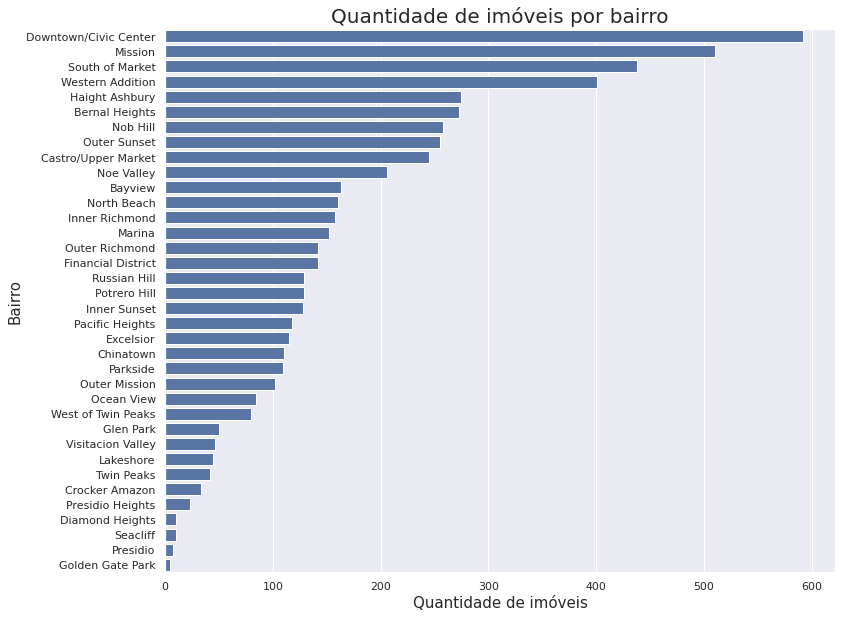

In [26]:
# exibir o gráfico
plt.title('Quantidade de imóveis por bairro', size = 20)
sns.barplot(data = qtde_bairro_imoveis, x = 'qtde_imoveis', y = 'bairro', color = 'b')
plt.xlabel('Quantidade de imóveis', size = 15)
plt.ylabel('Bairro', size = 15)
plt.show()

## Qual a média do valor da diária por bairro?

In [27]:
# Calcular a média de preços por bairro e ordenar o resultado em order decrescente
media_preco_bairro = df_clean.groupby(['neighbourhood'])['price'].mean().reset_index()
media_preco_bairro.sort_values(by=['price'],ascending = False, inplace = True)

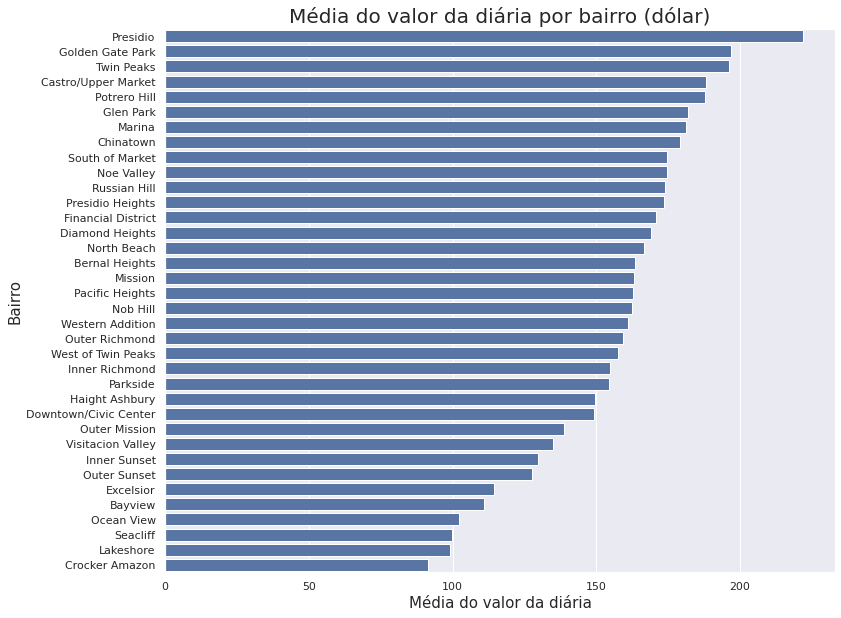

In [28]:
# exibir o gráfico
plt.title('Média do valor da diária por bairro (dólar)', size = 20)
sns.barplot(data = media_preco_bairro, x = 'price', y = 'neighbourhood', color = 'b')
plt.xlabel('Média do valor da diária', size = 15)
plt.ylabel('Bairro', size = 15)
plt.show()

## Quais os bairros possuem mais reviews?

In [29]:
# Somar a quantidade de reviews por bairro e ordenar o resultado em order decrescente
qtde_reviews_bairro = df_clean.groupby(['neighbourhood'])['number_of_reviews'].sum().reset_index()
qtde_reviews_bairro.sort_values(by=['number_of_reviews'],ascending = False, inplace = True)

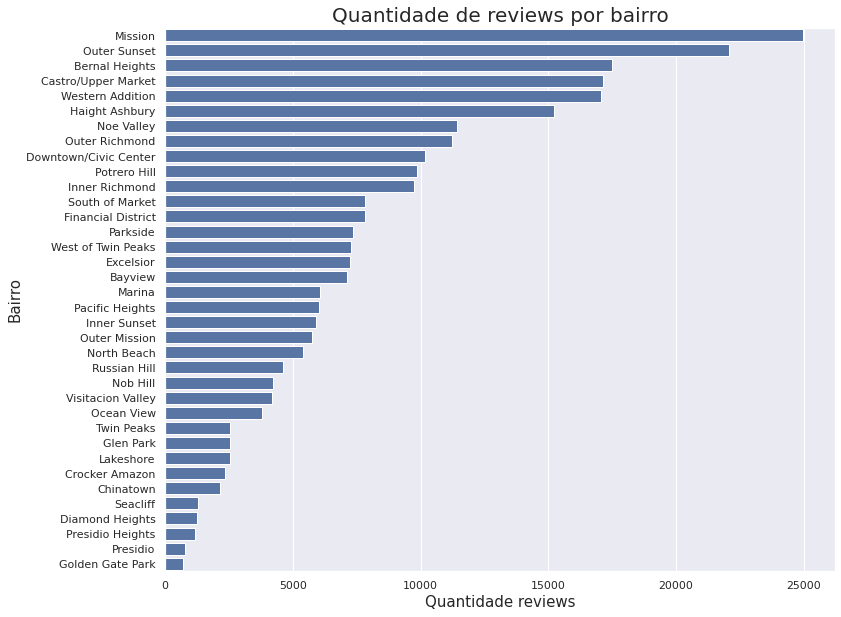

In [30]:
# exibir o gráfico
plt.title('Quantidade de reviews por bairro', size = 20)
sns.barplot(data = qtde_reviews_bairro, x = 'number_of_reviews', y = 'neighbourhood', color = 'b')
plt.xlabel('Quantidade reviews', size = 15)
plt.ylabel('Bairro', size = 15)
plt.show()

## Quais os tipos de imóveis mais alugados?

In [31]:
# Verificar quais são os tipos de imóveis mais alugados e ordenar o resultado em order decrescente
tipo_imovel_mais_alugado = df_clean['room_type'].value_counts().reset_index()
tipo_imovel_mais_alugado.rename(columns = {'index':'tipo_imovel','room_type':'quantidade'}, inplace = True)

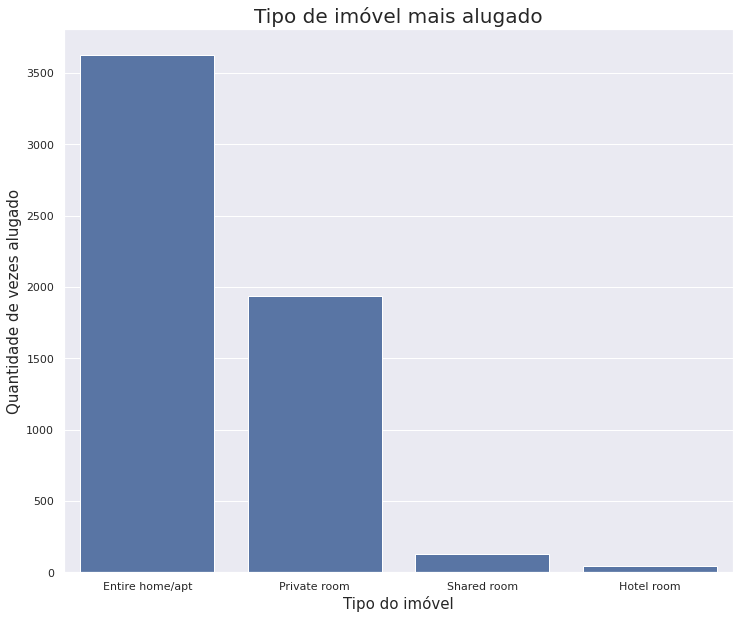

In [32]:
# exibir o gráfico
plt.title('Tipo de imóvel mais alugado', size = 20)
sns.barplot(data = tipo_imovel_mais_alugado, x = 'tipo_imovel', y = 'quantidade', color = 'b')
plt.xlabel('Tipo do imóvel', size = 15)
plt.ylabel('Quantidade de vezes alugado', size = 15)
plt.show()

## Representação das coordenadas

### Propriedades que mais ficam disponíves X Propriedades que menos ficam disponíves

In [33]:
qtde_propriedades = 30

In [34]:
# Verificar as 30 propriedades que mais ficam disponiveis
propriedades_mais_disponiveis = df_clean[['availability_365','name','latitude','longitude']].sort_values(by=['availability_365'], ascending = False)[:qtde_propriedades].reset_index(drop = True)

# Verificar as 30 propriedades que menos ficam disponiveis
propriedades_menos_disponiveis = df_clean[['availability_365','name','latitude','longitude']].sort_values(by=['availability_365'], ascending = True)[:qtde_propriedades].reset_index(drop = True)

**Legenda**

* **azul** - localizações dos pontos das 30 propriedades que mais ficam disponíveis
* **verde** - localizações dos pontos das 30 propriedades que menos ficam disponíveis

In [35]:
# Exibir as propriedades no mapa

locais = folium.Map(
    location=[propriedades_mais_disponiveis['latitude'].mean(), propriedades_mais_disponiveis['longitude'].mean()], width = 500, height = 500, zoom_start=12
)

for cnt in range(len(propriedades_mais_disponiveis)):
    folium.Marker(
        [propriedades_mais_disponiveis['latitude'][cnt],propriedades_mais_disponiveis['longitude'][cnt]],
        tooltip= propriedades_mais_disponiveis.iloc[cnt]["name"],
        icon=folium.Icon(color='blue')
    ).add_to(locais)
    
for cnt in range(len(propriedades_menos_disponiveis)):
    folium.Marker(
        [propriedades_menos_disponiveis['latitude'][cnt],propriedades_menos_disponiveis['longitude'][cnt]],
        tooltip= propriedades_menos_disponiveis.iloc[cnt]["name"],
        icon=folium.Icon(color='green')
    ).add_to(locais)

locais

### Diárias maiores preços X Diárias menores preços (dólar)

In [36]:
# Verificar as 30 propriedades das diárias com maiores valores
maiores_valores = df_clean[['name','longitude', 'latitude','price']].sort_values(by=['price'],ascending = False).reset_index(drop = True)[:qtde_propriedades]

# Verificar as 30 propriedades das diárias com menores valores
menores_valores = df_clean[['name','longitude', 'latitude','price']].sort_values(by=['price']).reset_index(drop = True)[:qtde_propriedades]

**Legenda**

* **azul** - localizações dos pontos das 30 diárias com maiores preços
* **verde** - localizações dos pontos das 30 diárias com menores preços 

In [37]:
# Exibir as propriedades no mapa

locais = folium.Map(
    location=[maiores_valores['latitude'].mean(), maiores_valores['longitude'].mean()], width = 500, height = 500, zoom_start=12
    
)

for cnt in range(len(maiores_valores)):
    folium.Marker(
        [maiores_valores['latitude'][cnt],maiores_valores['longitude'][cnt]],
        tooltip= f'Propriedade: {maiores_valores.iloc[cnt]["name"]} - Valor diária: {maiores_valores.iloc[cnt]["price"]}',
        icon=folium.Icon(color='blue')
    ).add_to(locais)
    
for cnt in range(len(menores_valores)):
    folium.Marker(
        [menores_valores['latitude'][cnt],menores_valores['longitude'][cnt]],
        tooltip= f'Propriedade: {menores_valores.iloc[cnt]["name"]} - Valor diária: {menores_valores.iloc[cnt]["price"]}',
        icon=folium.Icon(color='green')
    ).add_to(locais)

locais

## Conclusão


O Airbnb nos fornece um conjunto de dados fascinante com mais de 6000 pontos espalhados em San Franscisco.

Após as análises, identificamos que Entire home/apt, é o tipo de imóvel mais alugado.

Em relação aos bairros:
- Downtown/Civic Center possuí o maior número de propriedades para serem alugadas
- Presidio obteve a média do valor da diária mais alta 
- Mission é o bairro com a maior quantidade de reviews

Porém pelo fato do dataset ter bairros com bem mais imóveis do que outros, isso pode influenciar os resultados.

Lembrando que conjunto de dados que está sendo utilizado já é uma versão resumida, após o processo de limpeza e remoção de valores, como por exemplo outliers, reduzimos o dataset ainda mais, o que também pode influenciar os resultados.